Import required libraries.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

To load the dataset.

In [27]:
loan_df=pd.read_csv('loan_data.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Exploratory Data Analysis(EDA).

In [28]:
#To see top few records.
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
#To see bottom few records.
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [30]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Applicant Income       int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
loan_df.describe()

,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
# Handle missing values
loan_df.fillna(method='ffill', inplace=True)  # Forward fill missing values

In [37]:
# Encode categorical variables
df_encoded = pd.get_dummies(loan_df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

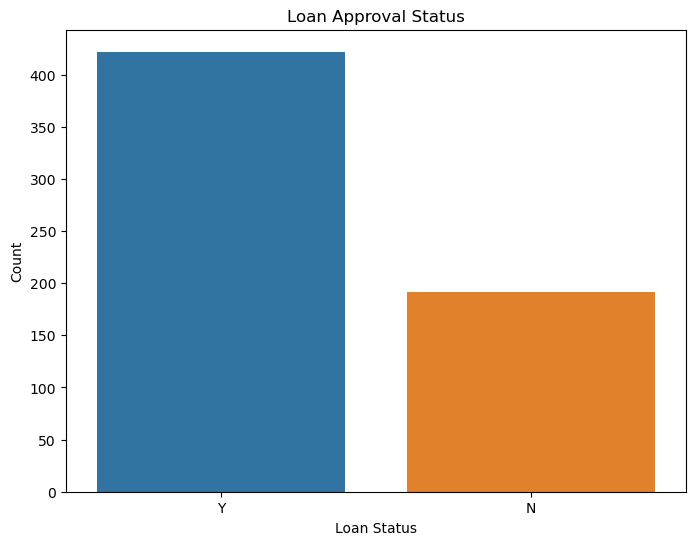

In [41]:
# Bar plot for Loan_Status (target variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=df_encoded)
plt.title('Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

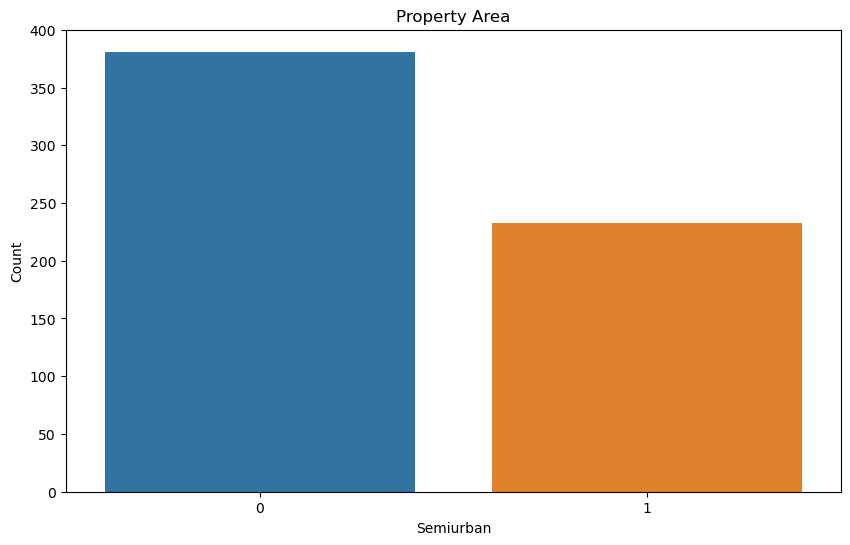

In [42]:
# Bar plot for Property_Area
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area_Semiurban', data=df_encoded)
plt.title('Property Area')
plt.xlabel('Semiurban')
plt.ylabel('Count')
plt.show()

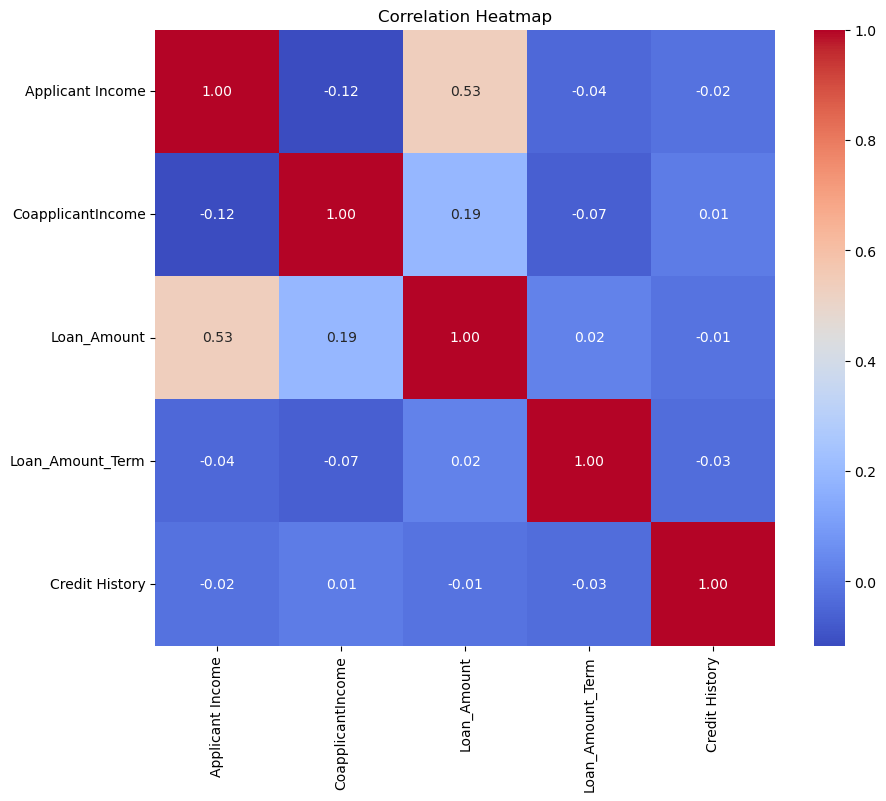

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(loan_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Split Data and Standardize Features.

In [43]:
# Split the data into features and target variable
X = df_encoded.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df_encoded['Loan_Status']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Check the data types of columns in X_train and X_test
print(X_train.dtypes)

# Convert 'Dependents' column to string type
X_train['Dependents'] = X_train['Dependents'].astype(str)
X_test['Dependents'] = X_test['Dependents'].astype(str)

# Remove '+' character and convert to numeric
X_train['Dependents'] = X_train['Dependents'].str.replace('+', '', regex=False).astype(int)
X_test['Dependents'] = X_test['Dependents'].str.replace('+', '', regex=False).astype(int)

# Check the data types again to ensure all columns are numeric
print(X_train.dtypes)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dependents                   int32
Applicant Income             int64
CoapplicantIncome          float64
Loan_Amount                float64
Loan_Amount_Term           float64
Credit History             float64
Gender_Male                  uint8
Married_Yes                  uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object
Dependents                   int32
Applicant Income             int64
CoapplicantIncome          float64
Loan_Amount                float64
Loan_Amount_Term           float64
Credit History             float64
Gender_Male                  uint8
Married_Yes                  uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object


Build and Test multiple models.

In [50]:
# Initialize models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [53]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean'.
imputer = SimpleImputer(strategy='mean')

# Fit and transform imputer on X_train_scaled
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform X_test_scaled using the same imputer
X_test_imputed = imputer.transform(X_test_scaled)

# Train models with imputed data
logreg_model.fit(X_train_imputed, y_train)
rf_model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Make predictions
logreg_preds = logreg_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)

In [55]:
# Evaluate models
logreg_accuracy = accuracy_score(y_test, logreg_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 0.80


Checking Underfitting/ Overfitting and cross validation.

In [57]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy 'mean'.
imputer = SimpleImputer(strategy='mean')

# Fit and transform imputer on X_train_scaled
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Transform X_test_scaled using the same imputer
X_test_imputed = imputer.transform(X_test_scaled)

# Cross-validation scores with imputed data
cv_scores_logreg = cross_val_score(logreg_model, X_train_imputed, y_train, cv=5)
cv_scores_rf = cross_val_score(rf_model, X_train_imputed, y_train, cv=5)

print(f'Cross-Validation Scores - Logistic Regression: {cv_scores_logreg}')
print(f'Cross-Validation Scores - Random Forest: {cv_scores_rf}')

Cross-Validation Scores - Logistic Regression: [0.82828283 0.81632653 0.80612245 0.76530612 0.7755102 ]
Cross-Validation Scores - Random Forest: [0.81818182 0.79591837 0.74489796 0.79591837 0.79591837]


In [60]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation/test sets
X_train_full, X_val, y_train_full, y_val = train_test_split(X_train_imputed, y_train, test_size=0.2, random_state=42)

# Train models on the full training set
logreg_model.fit(X_train_full, y_train_full)
rf_model.fit(X_train_full, y_train_full)

# Calculate training accuracy
train_accuracy_logreg = accuracy_score(y_train_full, logreg_model.predict(X_train_full))
train_accuracy_rf = accuracy_score(y_train_full, rf_model.predict(X_train_full))

# Calculate validation/test accuracy
val_accuracy_logreg = accuracy_score(y_val, logreg_model.predict(X_val))
val_accuracy_rf = accuracy_score(y_val, rf_model.predict(X_val))

print(f'Train Accuracy - Logistic Regression: {train_accuracy_logreg:.2f}')
print(f'Train Accuracy - Random Forest: {train_accuracy_rf:.2f}')
print(f'Validation/Test Accuracy - Logistic Regression: {val_accuracy_logreg:.2f}')
print(f'Validation/Test Accuracy - Random Forest: {val_accuracy_rf:.2f}')

Train Accuracy - Logistic Regression: 0.83
Train Accuracy - Random Forest: 1.00
Validation/Test Accuracy - Logistic Regression: 0.73
Validation/Test Accuracy - Random Forest: 0.75


Hyper parameter tuning on the final model (Random Forest) and save the best model for production.

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest with the defined parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_imputed, y_train)

# Get the best hyperparameters and the best model from GridSearchCV
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f'Best Parameters - Random Forest: {best_params_rf}')

# Save the best model for production
joblib.dump(best_model_rf, 'best_loan_approval_model.pkl')

Best Parameters - Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


['best_loan_approval_model.pkl']

# Documentation.

Project Overview.

->This project aims to predict whether a loan application will be approved or not based on various applicant details such as credit history, income, loan amount, education, etc. The dataset used contains information about past loan applications, including their approval sstatus.

Steps followed:

1.Data preprocessing and exploration:
->Handled missing values using imputation techniques.
->Converted categorical variables into numerical format using encoding.
->Explored the dataset to understand disticutions and relationships.

2.Feature Engineering:
->Created new features if deemed necessary for model training.
->Applied feautre scaling and normalization for numerical variables.

3.Model Building:
->Trained multiple models such as Logistic Regression and Random Forest Classifier.
->Performed hyperparameter tuning using GridSearchCV to optimize model performance.

4.Evaluation and Validation:
->Checked for overfitting/ underfitting by comparing training and validation/test accuaracies.
->Utilized cross-validation techniques to ensure model generalization.

5.Best Model Selection:
->Selected the best-performing model based on validation/test set metrics.
->Saved the best model for production use.

Conclusion:

->This project demonstrates the application of machine learning techniques in predicting loan approval status. The trained model can be used by financial institutions to automate loan approval processes and make data-driven decisions.